# 2DI70 Statistical Learning Theory 
## Assignment 1

### Group x
Name1 ID1

Name2 ID2

Name3 ID3

In [1]:
# Imports here
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import numpy as np
import operator


#### Load MNIST data from csv files

In [2]:
train_small = pd.read_csv("MNIST_train_small.csv").values
test_small  = pd.read_csv("MNIST_test_small.csv").values

In [3]:
## Normalizing the data is probably not necessary for this specific dataset
X_train_s = train_small[:, 1:]/255.0
y_train_s = train_small[:,0]

X_test_s = test_small[:, 1:]/255.0
y_test_s = test_small[:,0]

#### Define functions

In [4]:
## Render chosen data point as image
def show_img(data, index):
    plt.imshow(data[index].reshape(28,28), cmap = "Greys")
    plt.show()

In [327]:
## Compute the nth root of given value
def n_root(val, p):   
    return val**(1 / float(p))
  
## Compute Minkowski distance for two given vectors
## Use p = 2 for Euclidian distance
def minkowski_dist(x1, x2, p):    
    p_sum = sum(pow(abs(a-b), p) for a, b in zip(x1, x2))
    return n_root(p_sum, p) 
  
v1 = X_train_s[0]
v2 = X_train_s[1]
print(minkowski_dist(v1, v2, 1)) 

95.31764705882351


In [6]:
## Compute p-minkowski distance from point to every datapoint in collection
## The list of labels should share length and indices with collection
def compute_dists(point, collection, labels, p):
    vals = []
    for i in range(len(collection)):
        d = minkowski_dist(point, collection[i], p)
        vals.append([i, d, labels[i]])
    
    return vals

In [135]:
## Compute all Minkowski distances from 1 to p from 2 points recursively
## This is a slightly tainted recursion

def rec_part_dists(x1, x2, p, results):
    if(p==1):
        difs = abs(x1-x2)
        results.append(difs)
        return difs
    else:
        inter = rec_part_dists(x1, x2, p-1, results)
        results.append([a*b for a,b in zip(results[0],inter)])
        return results[p-1]
    
def mink_dists(d):   
    mkdists = []
    for i in range(len(d)):
        mkdists.append(n_root(sum(d[i]),i+1))
    return mkdists

## This returns the final distances
def gen_dists(v1,v2,p):
    partials = []
    rec_part_dists(v1,v2,p,partials)
    return mink_dists(partials)



#### Do KNN magic

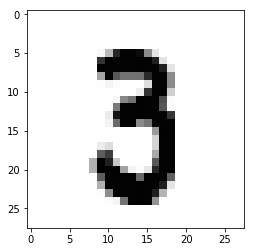

In [7]:
## Compute knn for example data
show_img(X_train_s, 0)
dists1 = compute_dists(X_train_s[0], X_train_s, y_train_s, 2)

In [8]:
## Since the point we selected is in the training set, it shows up in the list with a distance of 0
## In this case, we can confidently say it is a 3
dists1_sorted = sorted(dists1, key = lambda x: float(x[1]))
dists1_sorted[0:10]

[[0, 0.0, 3],
 [738, 5.260808796066775, 3],
 [163, 5.314273902674663, 3],
 [1273, 5.70711529028132, 3],
 [610, 5.733737010010271, 3],
 [1120, 5.750525442785872, 3],
 [2373, 5.8194902477416495, 3],
 [1504, 5.839323666682236, 3],
 [1790, 5.952746128195252, 3],
 [1597, 5.990987720867725, 3]]

In [152]:
n = len(X_train_s)
m_dists = np.full((n, n, ), inf)

In [159]:
k = 20
p = 15
n = len(X_train_s)
m_dists = np.full((n, n, p), inf)

In [290]:
##Grid based search to find k and p simultaneously using LOOCV
##First, calculate all required minkowski distances
##Can be interrupted and resumed (change 'start'), and saves to disk
start = 0
end = n
timeold=time.time()
for i in range(start,end):
    #Only calculate for points with higher index to avoid calculating the same distance twice
    for j in range(i,n):   
        m_dists[i][j] = gen_dists(X_train_s[i], X_train_s[j],p)
    if (i%100==0): 
        print("done with elements: ",i)  
        timenew = time.time()
        np.save('data.npy', m_dists,allow_pickle=True) # save
        print(' took {:.2f} min'.format((timenew-timeold)/60))
        timeold = timenew
        

done with elements:  600
 took 0.15 min
done with elements:  700
 took 14.17 min
done with elements:  800
 took 13.46 min
done with elements:  900
 took 12.77 min
done with elements:  1000
 took 12.15 min
done with elements:  1100
 took 11.66 min
done with elements:  1200
 took 10.98 min
done with elements:  1300
 took 10.35 min
done with elements:  1400
 took 9.79 min
done with elements:  1500
 took 9.35 min
done with elements:  1600
 took 8.65 min
done with elements:  1700
 took 8.08 min
done with elements:  1800
 took 7.39 min
done with elements:  1900
 took 6.87 min
done with elements:  2000
 took 6.27 min
done with elements:  2100
 took 5.59 min
done with elements:  2200
 took 5.13 min
done with elements:  2300
 took 4.51 min
done with elements:  2400
 took 3.90 min
done with elements:  2500
 took 3.29 min
done with elements:  2600
 took 2.71 min
done with elements:  2700
 took 2.13 min
done with elements:  2800
 took 1.54 min
done with elements:  2900
 took 0.95 min


In [291]:
np.save('data_dists_fin.npy', m_dists,allow_pickle=True) # save
#new_num_arr = np.load('data.npy') # load

In [396]:
#Get top 21 results (as the point itself is still incuded at this stage) for all points
p_k_top20i = []
p_k_top20  = []
for j in range(15):
    top20s=[]
    top20si=[]
    for i in range(n):    
        #Since we wanted to avoid double calculations earlier, 
        #we now need to combine two arrays in order to reuse previous results
        list1 = np.swapaxes(dists_p_indexed[j],0,1)[i][0:i]
        list2=dists_p_indexed[j][i][i:n]
        totallist=np.concatenate((list1,list2))
        top20i=np.argsort(totallist)[0:21]
        top20=totallist[top20i]
        top20si.append(top20i)
        top20s.append(top20)
        #print(top20i)
        #print(top20)
    p_k_top20i.append(top20si)
    p_k_top20.append(top20s)

In [525]:
#Find average error for given k using 1/0-loss function
def calcerror(k, data, y):
    r=0
    errors=0
    for j in range(len(data)):
        pop=0
        labels = np.zeros(10)
        #First results will always be the point itself
        for l in range(1,k+1):
            pop+=1
            labels[y[data[j][l]]] += 1
        prediction = np.argmax(labels)
        if (y[j] != prediction):
            errors +=1
        r += 1 
    #print(pop)
    print(errors)    
    return errors/r

In [526]:
calcerror(20,p_k_top20i[0],y_train_s)

359


0.11970656885628543

In [481]:
#Find the average error over all points for all combinations of p and k
p_k_scores = np.zeros((15,20))
for o in range(15):
    for q in range(1,21):
        p_k_scores[o][q-1] = calcerror(q, p_k_top20i[o], y_train_s)

In [523]:
#Results
p_k_scores

array([[0.08969657, 0.10036679, 0.0936979 , 0.09169723, 0.09636546,
        0.09636546, 0.09836612, 0.0966989 , 0.0996999 , 0.10303434,
        0.10236746, 0.10336779, 0.10470157, 0.10636879, 0.11037012,
        0.11103701, 0.11437146, 0.11570524, 0.11837279, 0.11970657],
       [0.08069356, 0.08869623, 0.0786929 , 0.07902634, 0.08002668,
        0.08302768, 0.08336112, 0.08936312, 0.0876959 , 0.09003001,
        0.09203068, 0.09436479, 0.09503168, 0.09436479, 0.09603201,
        0.09836612, 0.09736579, 0.10036679, 0.09903301, 0.10103368],
       [0.07535845, 0.08236079, 0.07102367, 0.07402467, 0.07535845,
        0.08002668, 0.07969323, 0.0816939 , 0.08436145, 0.08369456,
        0.08669557, 0.08969657, 0.08902968, 0.0876959 , 0.09236412,
        0.09236412, 0.09536512, 0.09469823, 0.09436479, 0.09836612],
       [0.07335779, 0.07602534, 0.0696899 , 0.07202401, 0.07169056,
        0.07735912, 0.07702568, 0.07902634, 0.07969323, 0.0786929 ,
        0.07935979, 0.08369456, 0.08369456, 0

In [512]:
np.save('datatop20kpn.npy', p_k_scores) # save

In [275]:
#Benchmark minkowski distance calcualtions
import time
reass = []
time1 = time.time()
for i in range(15):
    a=minkowski_dist(X_train_s[99],X_train_s[100],i+1)
time2 = time.time()



time3 = time.time()

a= gen_dists(X_train_s[99],X_train_s[100],15)

time4 = time.time()
print(' function took {:.3f} ms'.format((time2-time1)*1000.0))

print(' function took {:.3f} ms'.format((time4-time3)*1000.0))

 function took 12.003 ms
 function took 6.997 ms
